# CA1 Assigment Submission:
**Author:** Dexter Chew
<br>**Date:** 29th May 2022
<br>**Student ID:** p7414405

### Report Overview
This Notebook is written as a submission report for CA1 Assignment. In the report there will be 3 separate datasets that requires analysis - Part A-C. <br><br> In Part A, I will be analyzing the Titanic Dataset from Kaggle. This is a classification problem to predict whether an individual would have survied the titanic incident. I will be creating a ML pipeline to assess this data. For Part B, I will be analysing the King County dataset and attempt to create a ML model that predicts the housing sales prices. Lastly, for Part C, I will be analyzing the 

## Contents Page
- [Part A: Titantic Classification Problem](#section_ID)
     - Exploratory Data Analysis (EDA)
     - Data Preparation (Training Data)
     - Train Model
     - Score and Evaluate Model
     - Kaggle Submission  

    

In [100]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

************************
        Versions        
************************
Scikit-learn version=0.22.1
Numpy version=1.18.1
Pandas version=1.0.1
Matplotlib version=3.1.3
Python version=3.7.6


In [101]:
train_datalink = r"data\titanic\train.csv"
titanic = pd.read_csv(train_datalink)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [102]:
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## 2. Exploratory Data Analysis

Purpose: To bring to light the attributes that are available and to identify the data-type (e.g. integers,string,booleans etc.) and an overview of the attributes (e.g. presence of outliers, null-objects etc.) based on contexts for ease of processing later during data clean-up as well as identifying. Additionally, it is also good to identify the size of the dataset so that we can process the data during modelling as well (e.g. train-test split, data sufficiency, processing times etc.)

### Key Points Based on "Prior/Contextual Knowledge"

<ol>
<li>Individuals with different names might represent different ranks. </li>
<li>Younger and older people might survive better than regular individuals due to "weaker" population. </li>
<li>Similar could be said about gender as well. </li>
<li>Possibly that higher ranking indiivduals might survive better due to previledges. </li>
<li>Point of disembarkment will also suggest the seating locations/status of the individuals, suggesting potential predictor variables.</li>
<li>Checking for null values and addressing them into NaN then modify replace to mean/median or drop them.</li>
</ol>

In [103]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
# List out all variables with nulls/missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
# Get list of numeric and nonnumeric variables
numvars = list(titanic.columns[titanic.dtypes != "object"]) #Numerical Data
nonnumvars = list(titanic.columns[titanic.dtypes == "object"]) #Categorical Data
print(numvars)
print(nonnumvars)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### About Dataset

From Kaggle website that describes the dataset:

Variable | Definition | Key | Data | Type
| --- | --- | --- | --- | --- |
Survived | Survival | 0 = No, 1 = Yes | Categorical | Response
Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical (Ordinal) | Feature
Sex	| Sex	| --- | Categorical | Feature
Age | Age in years | --- | Numeric | Feature
SibSp | # of siblings / spouses aboard the Titanic | --- | Numeric | Feature
Parch | # of parents / children aboard the Titanic	| --- | Numeric | Feature
Ticket | Ticket number	| --- | Numeric | Feature
Fare | Passenger fare	| --- | Numeric | Feature
Cabin | Cabin number	| --- | Numeric | Feature
Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | Categorical | Feature
Name | Passenger's full name | --- | Categorical | Feature
PassengerId | Onboarding ID number | --- | Numeric | Feature

Text(0.5, 1.0, 'Bar Plot of Survived')

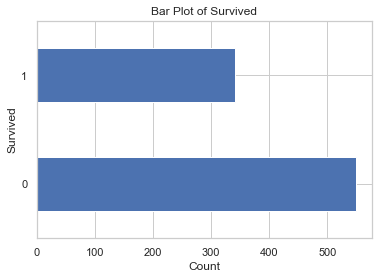

In [106]:
titanic['Survived'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel("Survived")
plt.title("Bar Plot of Survived")

Text(0.5, 1.0, 'Bar Plot of PClass')

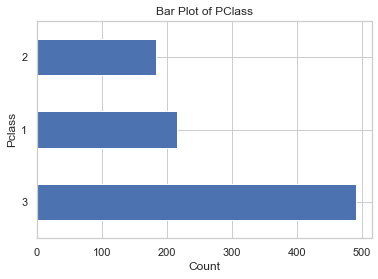

In [107]:
#Comments: While 
titanic['Pclass'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel("Pclass")
plt.title("Bar Plot of PClass")

Text(0.5, 1.0, 'Scatter plot of Passenger Id against Index')

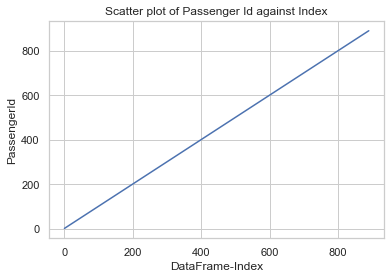

In [108]:
plt.plot(titanic.index,titanic['PassengerId'])
plt.xlabel('DataFrame-Index')
plt.ylabel("PassengerId")
plt.title("Scatter plot of Passenger Id against Index")

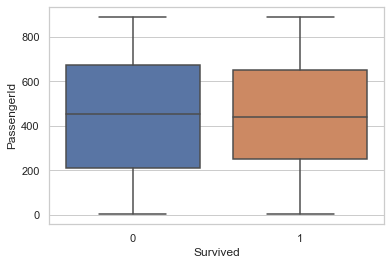

In [109]:
sns.boxplot(x='Survived', y='PassengerId', data=titanic)

### Comments
- Supposedly Survived, Pclass and PassengerId are actually categorical variables
- For Pclass, it is considered as ordinal data (Still under categorical data).
- For Survived, it is also a categorical data but can be considered is inherently coded.
- PassengerIds are found to be 1 step away from the index of the dataframe. Thus, this can actually be dropped if it is found that there is no relationship between th PassengerIds and survival rate. This will be true if the data that is laid out is random (i.e. no meaning in the Ids). From the boxplot, we can see that between staying alive or not, there is no significant difference in passengerids between the 2.
- Thus, to shift Pclass and Survived to categorical variables and drop PassengerIds.
- Also good to note that majority of the passengers are in lower 3rd class seats and most of them are dead.

In [110]:
# Do some further exploration on list to get list of features used
# 1. Numerical Variables
numvars.remove('PassengerId')
numvars.remove('Survived')
numvars.remove('Pclass')
numfeats = numvars
print("Numerical Variables:{}".format(numfeats))
# 2. Categorical Variables
nonnumvars.append('PassengerId')
nonnumvars.append('Survived')
nonnumfeats = nonnumvars
print("Categorical Variables:{}".format(nonnumfeats))

Numerical Variables:['Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables:['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'PassengerId', 'Survived']


### Numerical Features

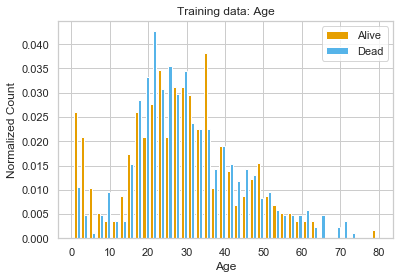

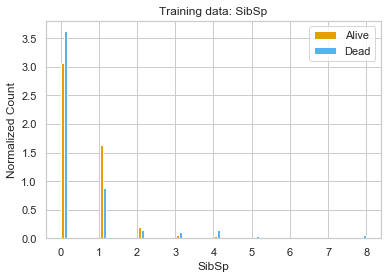

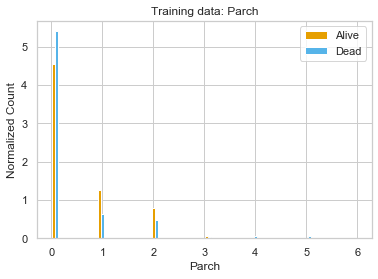

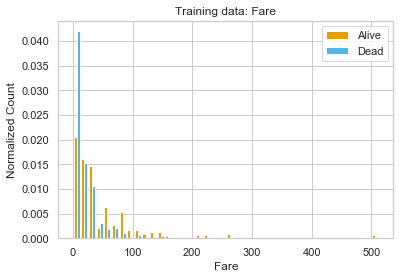

In [111]:
#Histogram: Indentification for Binning Potential
for num_data in numfeats:
    # Make a separate list for each survivor result
    x1 = list(titanic[titanic['Survived'] == 1][num_data])
    x2 = list(titanic[titanic['Survived'] == 0][num_data])
    # Normalize the flights and assign colors and names
    # Assign colors for each result and the names
    colors = ['#E69F00', '#56B4E9']
    names = ['Alive', 'Dead']
    plt.hist([x1, x2], bins = 40, normed=True,color = colors, label=names)
    #plt.hist(titanic[num_data],align='mid',bins=40)
    plt.title("Training data: " + num_data)
    plt.xlabel(num_data)
    plt.ylabel("Normalized Count")
    plt.legend()
    plt.show()

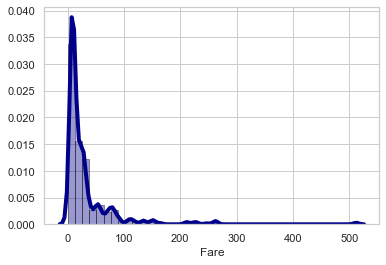

In [112]:
sns.distplot(titanic['Fare'], hist=True, kde=True, 
            bins=40, color = 'darkblue', 
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 4})

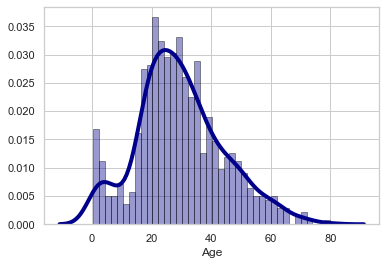

In [113]:
sns.distplot(titanic['Age'], hist=True, kde=True, 
            bins=40, color = 'darkblue', 
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 4})

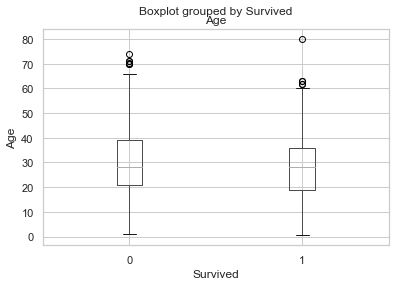

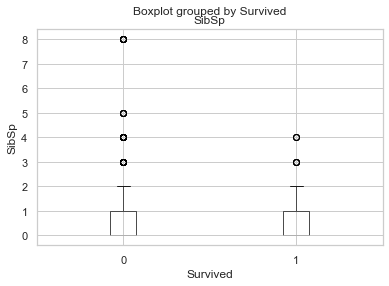

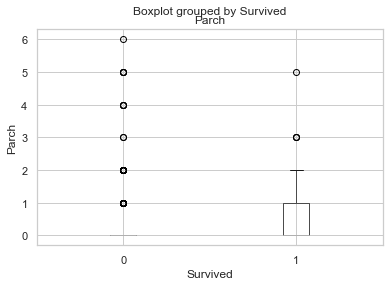

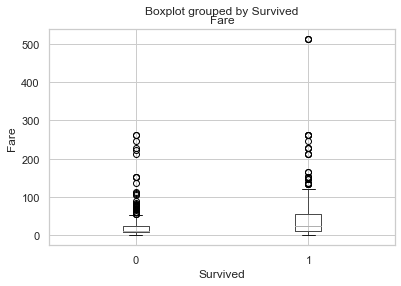

In [114]:
#Boxplots: To observe statistical differences
for num_data in numfeats:
    # Make a separate list for each survivor result
    titanic.boxplot(column= num_data, by='Survived')
    plt.xlabel("Survived")
    plt.ylabel(num_data)
    plt.show()

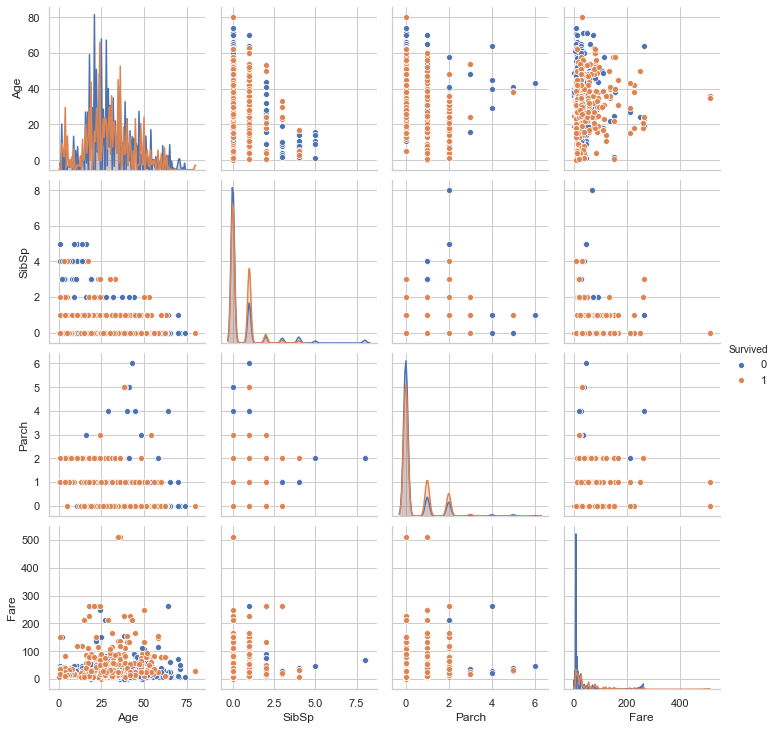

In [115]:
#Scatter plot: To illustrate the correlation (if any)
numfeats.append("Survived")
sns.pairplot(titanic[numfeats], hue="Survived", diag_kws={'bw': 0.1})
numfeats.remove("Survived")

Training data
            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


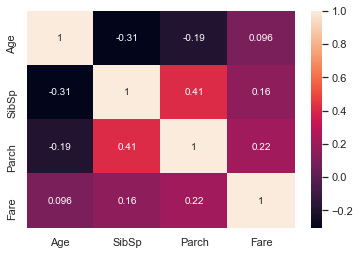

In [116]:
#Correlation Matrix: Identification of dependency potential relationship
# heat map to show up variables which show a high correlation...
# if two variables have a high corelation then they may not be independant so could 
# bias the ML algorithm (although not random forrest type models)
print("Training data")
print(titanic[numfeats].corr())
sns.heatmap(titanic[numfeats].corr(),annot=True)

### Comments:
- Potentially, having to bin the data (https://towardsdatascience.com/binning-for-feature-engineering-in-machine-learning-d3b3d76f364a)
- Age: To bin below 15 years old, between 15 to 45 and above 45 years old. We can see a distinct transition or presence of 3 distributions or groups of people on board the ship (i.e. the young, middle aged and the old). 
- We can see that younger people tend to survive better from the histogram.
- We can also see that having siblings and parents/spouse (i.e. relatives on board) in that matter, increases the survivability.
- Paying higher fares also seem to increase survivability rates.
- In terms of the correlation matrix, we can see that there is some weak linear relationship bewteen SibSp and Parch. This may suggests presence of families. When there's more parents or children, you have more siblings. In particular, the more children one has, the more counts of siblings will be observed. Other than this, the numerical factos remain quite independent.


### Categorical Features
- Missing analysis. To add in the count

In [117]:
def make_bins(df):
   label_names = ["Children", "Adults","Elderly" ]
   cut_points = [0,15, 45, 99]
   df["Oldness"] = pd.cut(df["Age"], cut_points, labels=label_names)
   return df

new_df = make_bins(titanic)

In [118]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Oldness
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adults
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Adults
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adults


## Part A: Titantic Dataset
<a id="section_ID"></a>